In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# Verify the correct number of files exist in data/NEM
file_no = 3 + 4 + 12 * 3
print(file_no)
for folder in os.listdir("data/NEM"):
    if os.path.isdir(os.path.join("data/NEM", folder)):
        files = os.listdir(os.path.join("data/NEM", folder))
        if len(files) != file_no:
            print(
                f"Folder {folder} does not contain exactly {file_no} files. Found: {len(files)} files."
            )
        else:
            print(
                f"Folder {folder} contains the correct number of files: {len(files)} files."
            )

43
Folder NSW contains the correct number of files: 43 files.
Folder QLD contains the correct number of files: 43 files.
Folder SA contains the correct number of files: 43 files.
Folder TAS contains the correct number of files: 43 files.
Folder VIC contains the correct number of files: 43 files.


In [ ]:
# Dictionary to store dataframes by state
state_data = {state: [] for state in ["NSW", "QLD", "SA", "TAS", "VIC"]}

# Read and append CSVs for each state
for state in state_data:
    state_dir = f"data/NEM/{state}"
    for file in os.listdir(state_dir):
        if file.endswith(".csv"):
            filepath = os.path.join(state_dir, file)
            df = pd.read_csv(filepath)
            state_data[state].append(df)

# Concatenate and save combined CSVs
for state, data_list in state_data.items():
    combined_df = pd.concat(data_list, ignore_index=True)
    combined_df.to_csv(f"data/NEM/{state}_combined.csv", index=False)

In [ ]:
def load_and_summarise_nem_data(data_dir="data/NEM", states=None, preview_rows=5):
    if states is None:
        states = ["NSW", "QLD", "SA", "TAS", "VIC"]

    dataframes = {}

    for state in states:
        file_path = f"{data_dir}/{state}_combined.csv"
        df = pd.read_csv(file_path)
        dataframes[state] = df
        display(df.head(preview_rows))

    return dataframes


nem_data = load_and_summarise_nem_data()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2021/10/01 00:05:00,7263.77,43.64,TRADE
1,NSW1,2021/10/01 00:10:00,7263.44,54.74,TRADE
2,NSW1,2021/10/01 00:15:00,7301.17,62.43,TRADE
3,NSW1,2021/10/01 00:20:00,7255.16,55.01,TRADE
4,NSW1,2021/10/01 00:25:00,7185.16,54.54,TRADE


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,QLD1,2021/10/01 00:05:00,5693.27,43.09,TRADE
1,QLD1,2021/10/01 00:10:00,5635.79,54.00,TRADE
2,QLD1,2021/10/01 00:15:00,5605.89,61.15,TRADE
3,QLD1,2021/10/01 00:20:00,5594.89,54.56,TRADE
4,QLD1,2021/10/01 00:25:00,5517.08,54.00,TRADE


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,SA1,2021/10/01 00:05:00,1376.74,17.22,TRADE
1,SA1,2021/10/01 00:10:00,1338.87,16.97,TRADE
2,SA1,2021/10/01 00:15:00,1323.73,8.57,TRADE
3,SA1,2021/10/01 00:20:00,1336.61,8.40,TRADE
4,SA1,2021/10/01 00:25:00,1326.17,8.49,TRADE


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,TAS1,2021/10/01 00:05:00,1067.92,16.23,TRADE
1,TAS1,2021/10/01 00:10:00,1069.43,16.23,TRADE
2,TAS1,2021/10/01 00:15:00,1064.68,8.07,TRADE
3,TAS1,2021/10/01 00:20:00,1079.01,8.07,TRADE
4,TAS1,2021/10/01 00:25:00,1069.78,8.05,TRADE


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2021/10/01 00:05:00,4612.52,17.99,TRADE
1,VIC1,2021/10/01 00:10:00,4669.22,17.99,TRADE
2,VIC1,2021/10/01 00:15:00,4597.48,8.95,TRADE
3,VIC1,2021/10/01 00:20:00,4585.36,8.95,TRADE
4,VIC1,2021/10/01 00:25:00,4544.61,8.95,TRADE


In [5]:
nsw_df = nem_data["NSW"]
qld_df = nem_data["QLD"]
sa_df = nem_data["SA"]
tas_df = nem_data["TAS"]
vic_df = nem_data["VIC"]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# --- Component 1: Basic Inspection ---
def inspect_df(df, region_name):
    print(f"\n========== EDA for {region_name} ==========")
    print("Shape:", df.shape)
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isna().sum())
    print("\nUnique Values:")
    print(df.nunique())


# --- Component 2: Prepare Time Series ---
def prepare_datetime_index(df, datetime_col):
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    return df.sort_values(datetime_col).set_index(datetime_col)


# --- Component 3: Summary Stats ---
def display_summary(df):
    display(df.describe())


# --- Component 4: Distribution Plots ---
def plot_price_distributions(df, region_name, price_col):
    plt.figure(figsize=(10, 4))
    sns.histplot(df[price_col], bins=100, kde=True)
    plt.title(f"{region_name} Price Distribution")
    plt.xlabel("Price ($/MWh)")
    plt.show()

    df["RRP_clipped"] = df[price_col].clip(upper=1000)
    plt.figure(figsize=(10, 4))
    sns.histplot(df["RRP_clipped"], bins=50, kde=True)
    plt.title(f"{region_name} Price Distribution (Clipped at $1000)")
    plt.xlabel("Price ($/MWh)")
    plt.show()


def price_bins_table(df, price_col):
    bin_edges = [
        -1000,
        -500,
        -200,
        -100,
        -50,
        0,
        50,
        100,
        200,
        500,
        1000,
        2000,
        5000,
        10000,
        15000,
        20000,
    ]
    bin_labels = [
        "-1000 to -500",
        "-500 to -200",
        "-200 to -100",
        "-100 to -50",
        "-50 to 0",
        "0-50",
        "50-100",
        "100-200",
        "200-500",
        "500-1k",
        "1k-2k",
        "2k-5k",
        "5k-10k",
        "10k-15k",
        "15k-20k",
    ]
    df["price_bin"] = pd.cut(
        df[price_col], bins=bin_edges, labels=bin_labels, right=False
    )
    freq_table = df["price_bin"].value_counts().sort_index().reset_index()
    freq_table.columns = ["Price Range ($/MWh)", "Frequency"]
    display(freq_table)


# --- Component 5: Demand Distribution ---
def plot_demand_distribution(df, region_name, demand_col):
    plt.figure(figsize=(10, 4))
    sns.histplot(df[demand_col], bins=100, kde=True, color="orange")
    plt.title(f"{region_name} Demand Distribution")
    plt.xlabel("Demand (MW)")
    plt.show()


# --- Component 6: Time Series Trend Plots ---
def plot_price_trend(df, region_name, price_col):
    threshold = df[price_col].quantile(0.95)
    plt.figure(figsize=(12, 4))
    df[price_col].plot()
    plt.axhline(threshold, color="red", linestyle="--", label="95th Percentile")
    plt.title(f"{region_name} Price Spikes")
    plt.legend(loc="upper left")
    plt.show()


def plot_demand_trend(df, region_name, demand_col):
    plt.figure(figsize=(12, 4))
    df[demand_col].plot(
        color="orange", ylabel="Demand (MW)", title=f"{region_name} Demand Over Time"
    )
    plt.show()


# --- Component 7: Correlation Heatmap ---
def plot_correlation(df, region_name, price_col, demand_col):
    corr = df[[price_col, demand_col]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{region_name} Price-Demand Correlation")
    plt.show()


# --- Component 8: Decomposition ---
def plot_decomposition(df, col, freq, model="additive", region_name="Region"):
    df = df[[col]].dropna()
    result = seasonal_decompose(df[col], model=model, period=freq)
    result.plot()
    plt.suptitle(f"{region_name} - {col} Decomposition", fontsize=14)
    plt.tight_layout()
    plt.show()


# --- Main Pipeline Function ---
def run_eda_pipeline(
    df,
    region_name="Region",
    datetime_col="SETTLEMENTDATE",
    price_col="RRP",
    demand_col="TOTALDEMAND",
):
    inspect_df(df, region_name)
    df = prepare_datetime_index(df, datetime_col)
    display_summary(df)
    plot_price_distributions(df, region_name, price_col)
    price_bins_table(df, price_col)
    plot_demand_distribution(df, region_name, demand_col)
    plot_price_trend(df, region_name, price_col)
    plot_demand_trend(df, region_name, demand_col)
    plot_correlation(df, region_name, price_col, demand_col)
    return df


========== EDA for NSW ==========
Shape: (374400, 5)

Data Types:
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Missing Values:
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Unique Values:
REGION                 1
SETTLEMENTDATE    374400
TOTALDEMAND       257636
RRP                42903
PERIODTYPE             1
dtype: int64


,TOTALDEMAND,RRP
count,374400.000000,374400.000000
mean,7462.302368,127.504834
std,1347.479171,447.299205
min,2532.250000,-1000.000000
25%,6526.127500,58.000000
50%,7342.555000,88.880000
75%,8222.470000,139.000000
max,13763.960000,17500.000000


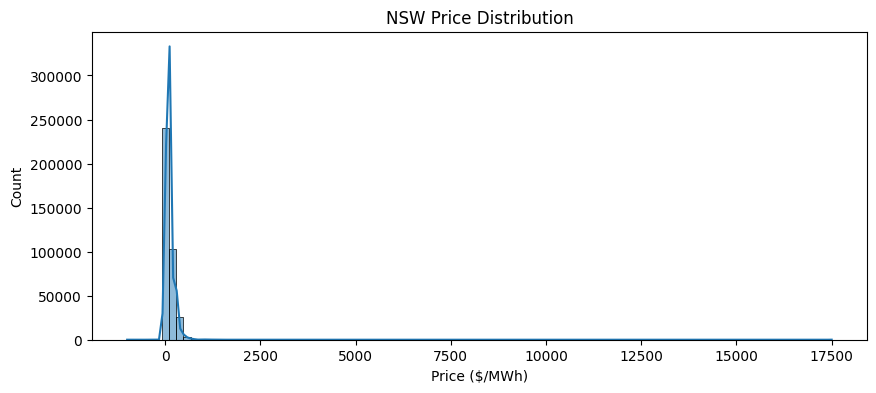

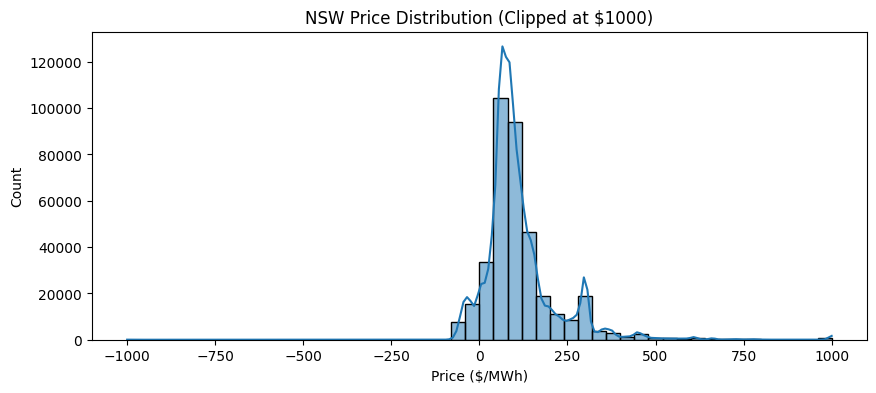

,Price Range ($/MWh),Frequency
0,-1000 to -500,55
1,-500 to -200,22
2,-200 to -100,19
3,-100 to -50,3019
4,-50 to 0,20013
5,0-50,44223
6,50-100,149785
7,100-200,103627
8,200-500,49778
9,500-1k,3001


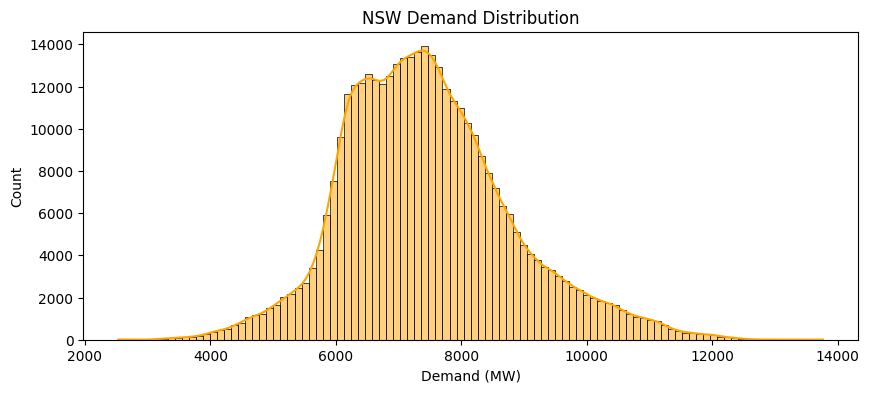

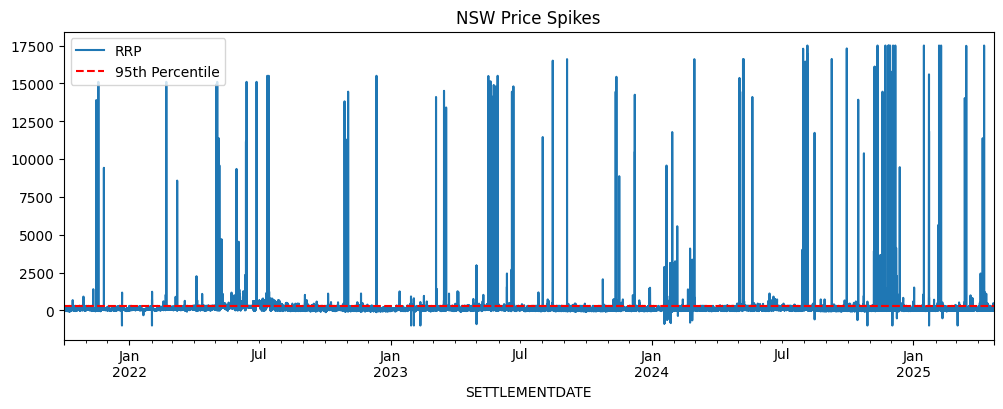

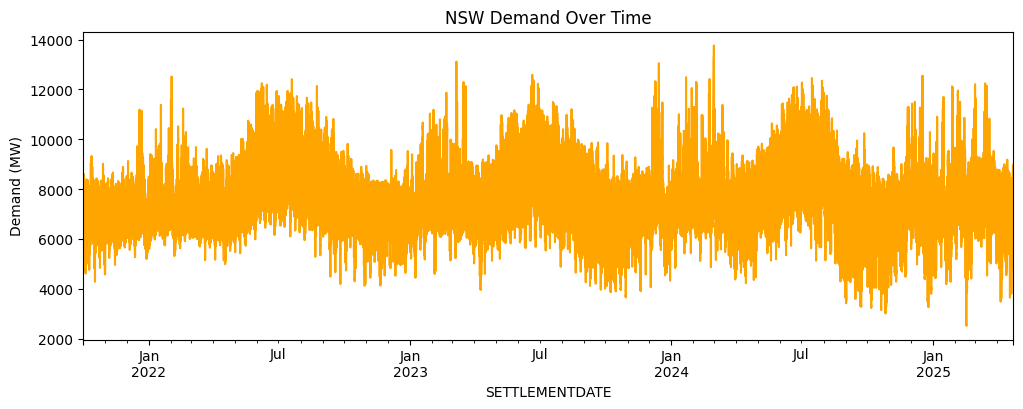

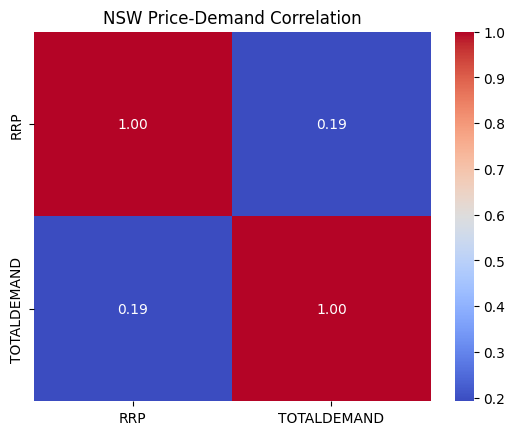

In [7]:
nsw_df = run_eda_pipeline(nsw_df, region_name="NSW")


========== EDA for QLD ==========
Shape: (374400, 5)

Data Types:
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Missing Values:
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Unique Values:
REGION                 1
SETTLEMENTDATE    374400
TOTALDEMAND       238507
RRP                42813
PERIODTYPE             1
dtype: int64


,TOTALDEMAND,RRP
count,374400.000000,374400.000000
mean,6136.557796,129.277597
std,1060.711165,482.037145
min,2975.310000,-1000.000000
25%,5425.877500,54.650000
50%,6018.530000,89.740000
75%,6828.657500,143.000000
max,11159.320000,17500.000000


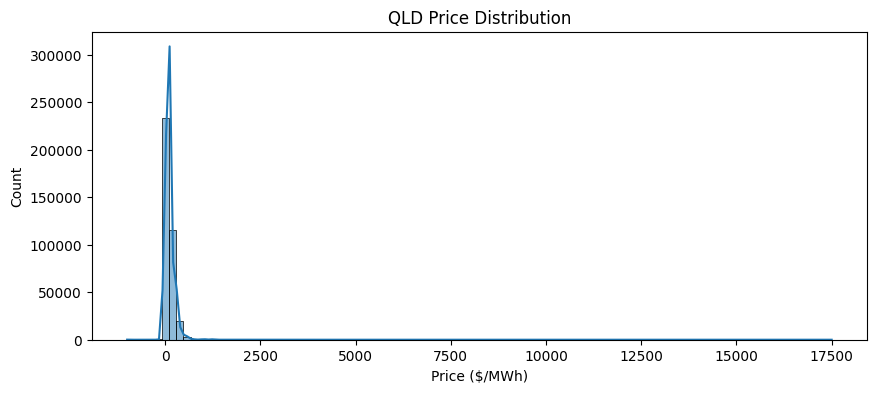

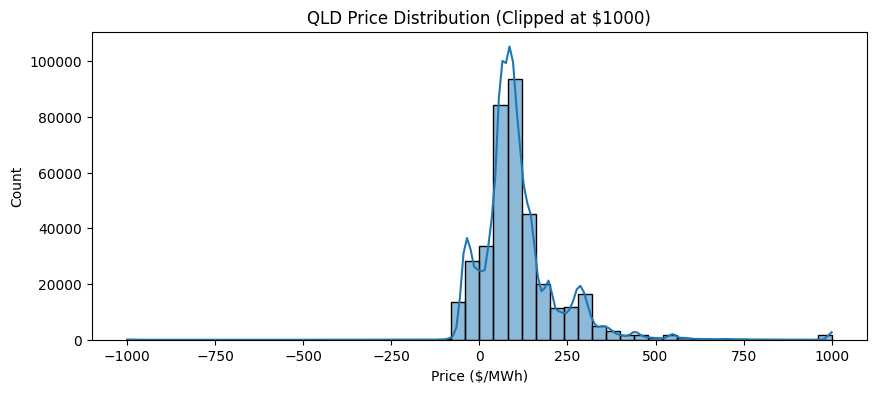

,Price Range ($/MWh),Frequency
0,-1000 to -500,55
1,-500 to -200,27
2,-200 to -100,28
3,-100 to -50,2809
4,-50 to 0,39036
5,0-50,43688
6,50-100,130824
7,100-200,102166
8,200-500,50891
9,500-1k,3466


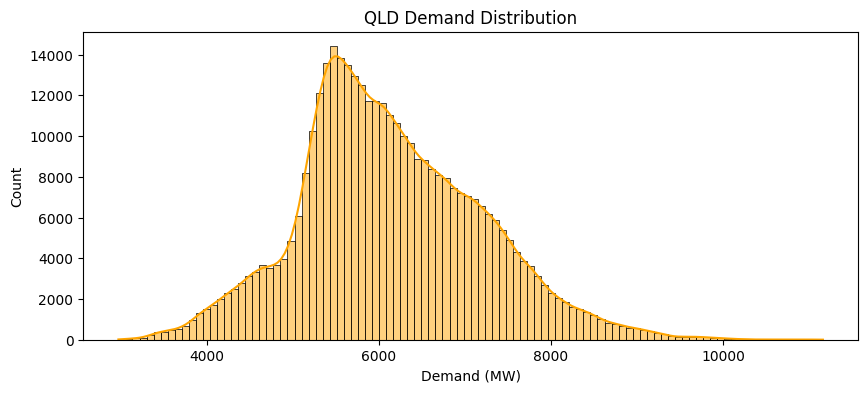

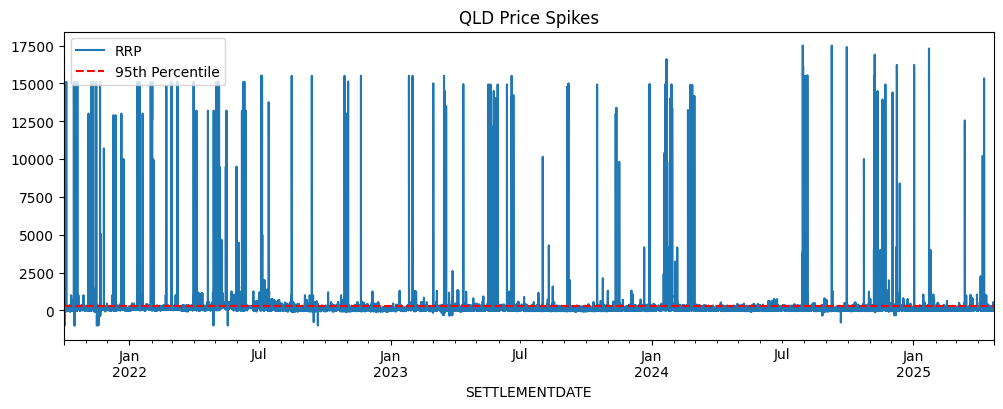

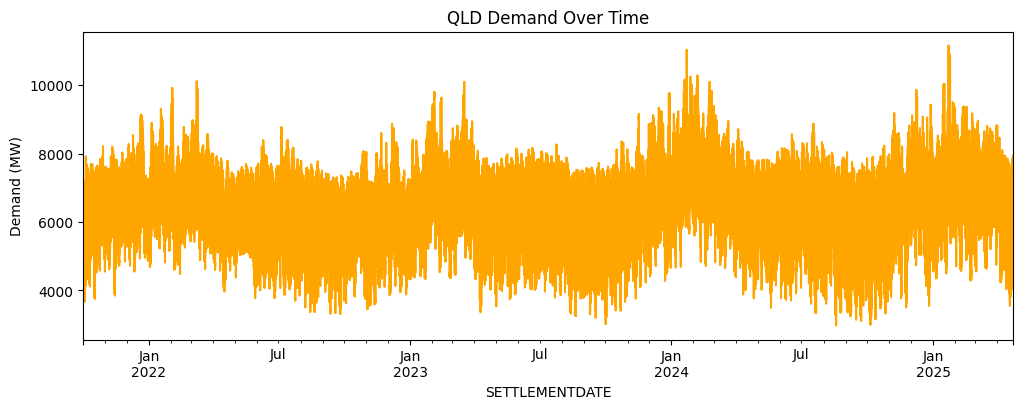

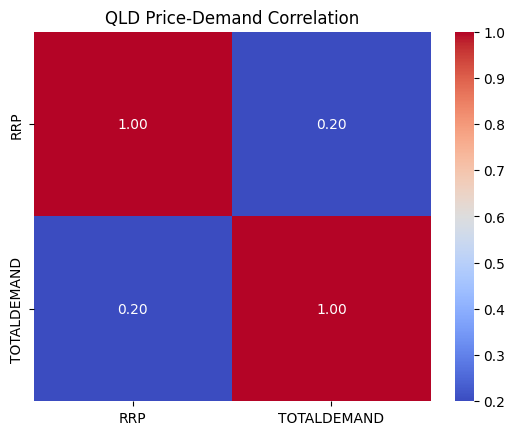

In [8]:
qld_df = run_eda_pipeline(qld_df, region_name="QLD")


========== EDA for SA ==========
Shape: (374400, 5)

Data Types:
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Missing Values:
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Unique Values:
REGION                 1
SETTLEMENTDATE    374400
TOTALDEMAND       148434
RRP                47886
PERIODTYPE             1
dtype: int64


,TOTALDEMAND,RRP
count,374400.000000,374400.000000
mean,1272.675444,103.342963
std,428.438117,468.929869
min,-231.820000,-1000.000000
25%,1079.635000,0.020000
50%,1328.650000,70.310000
75%,1517.120000,139.390000
max,3326.910000,17500.000000


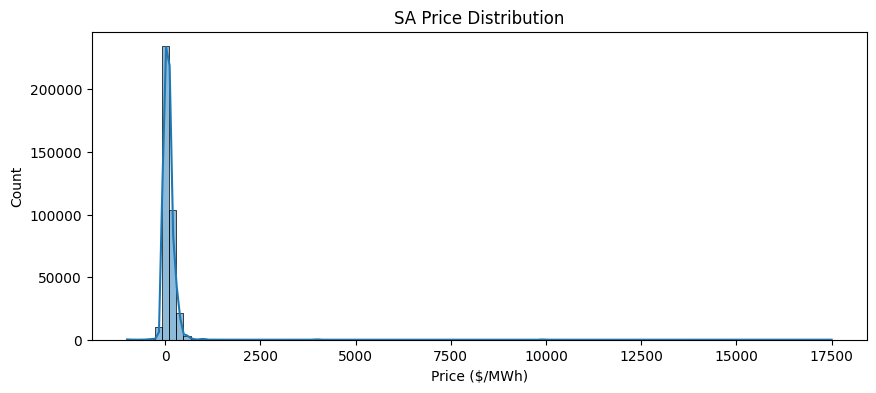

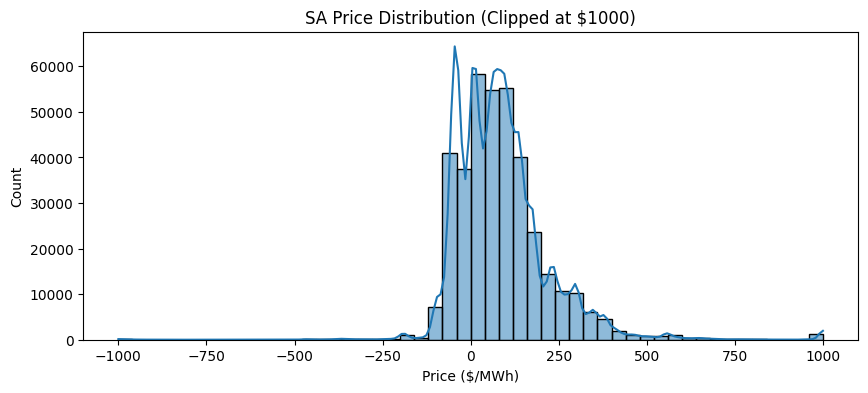

,Price Range ($/MWh),Frequency
0,-1000 to -500,273
1,-500 to -200,746
2,-200 to -100,2627
3,-100 to -50,25687
4,-50 to 0,58893
5,0-50,68422
6,50-100,75703
7,100-200,88116
8,200-500,49425
9,500-1k,3455


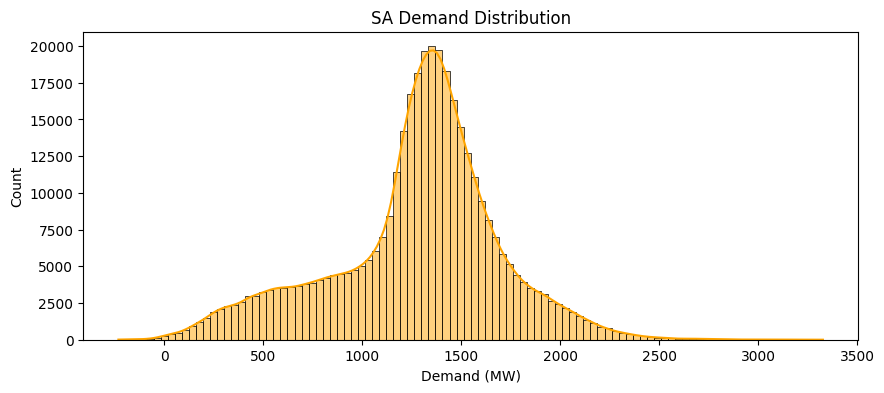

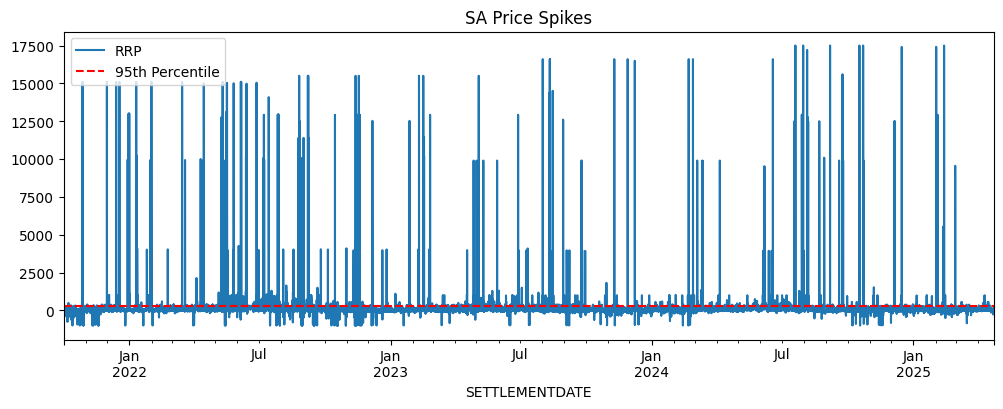

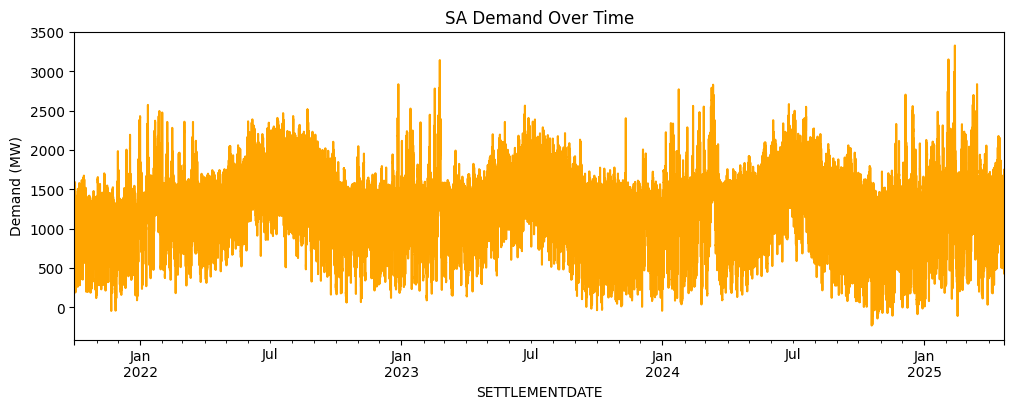

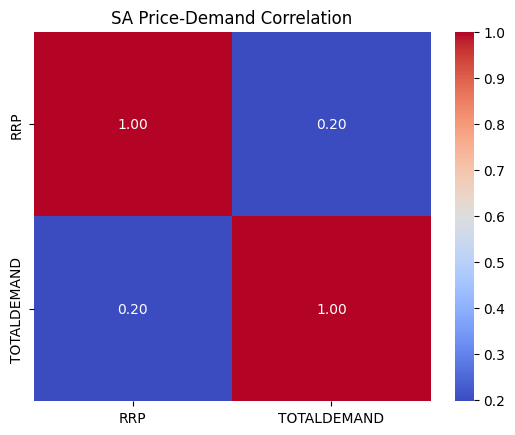

In [9]:
sa_df = run_eda_pipeline(sa_df, region_name="SA")


========== EDA for TAS ==========
Shape: (374400, 5)

Data Types:
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Missing Values:
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Unique Values:
REGION                 1
SETTLEMENTDATE    374400
TOTALDEMAND        67034
RRP                36704
PERIODTYPE             1
dtype: int64


,TOTALDEMAND,RRP
count,374400.000000,374400.000000
mean,1131.473936,95.437795
std,143.929818,258.589562
min,490.630000,-998.070000
25%,1029.520000,31.340000
50%,1111.630000,70.210000
75%,1214.450000,120.560000
max,1771.020000,17500.000000


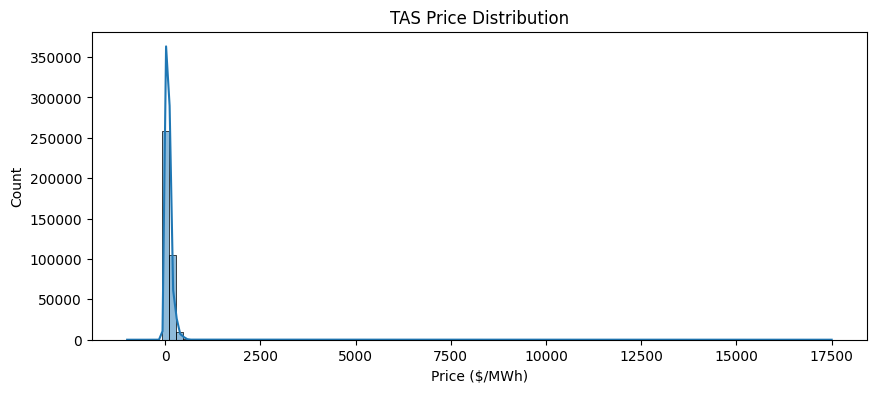

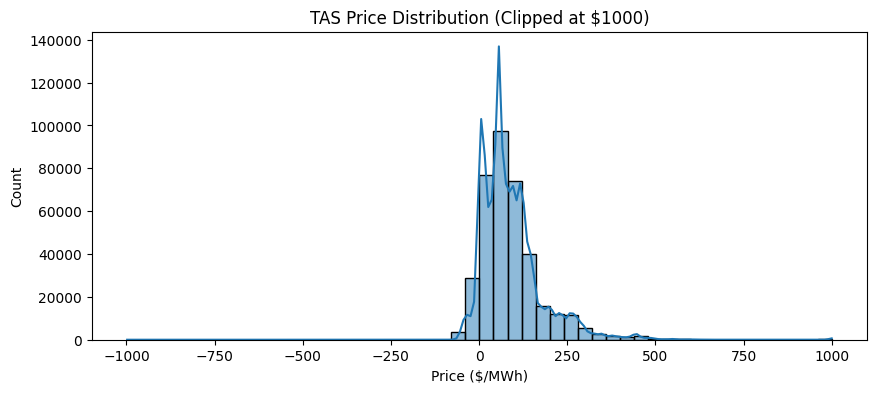

,Price Range ($/MWh),Frequency
0,-1000 to -500,13
1,-500 to -200,1
2,-200 to -100,21
3,-100 to -50,329
4,-50 to 0,19525
5,0-50,97840
6,50-100,118869
7,100-200,98750
8,200-500,37997
9,500-1k,812


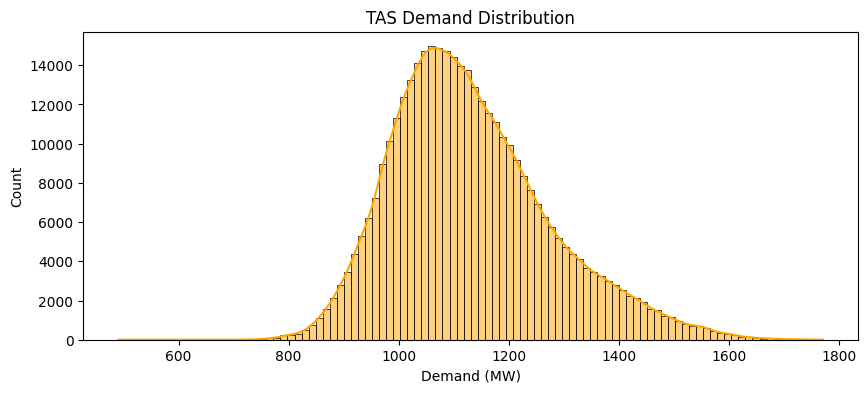

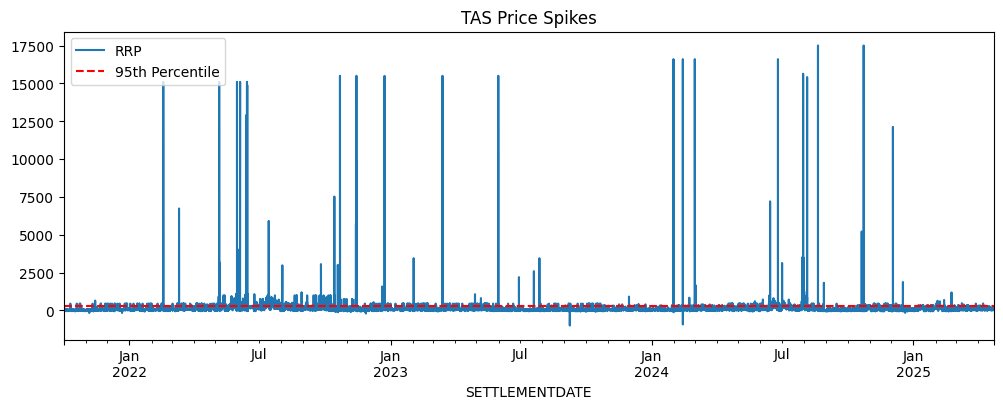

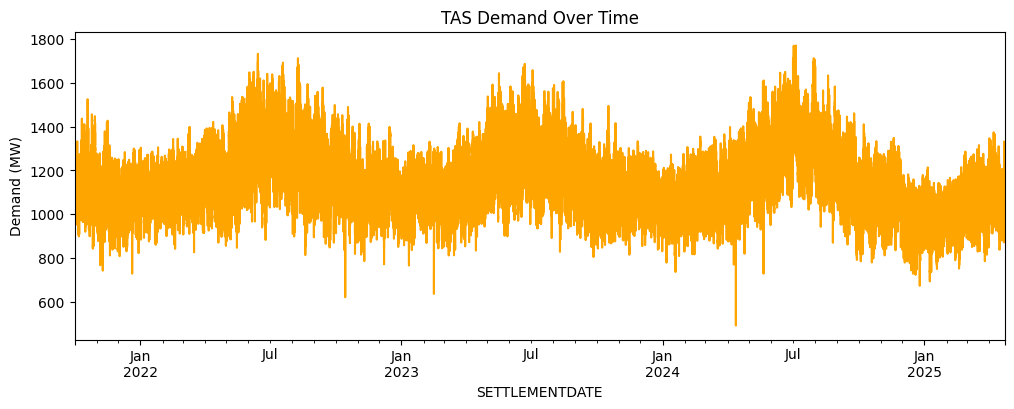

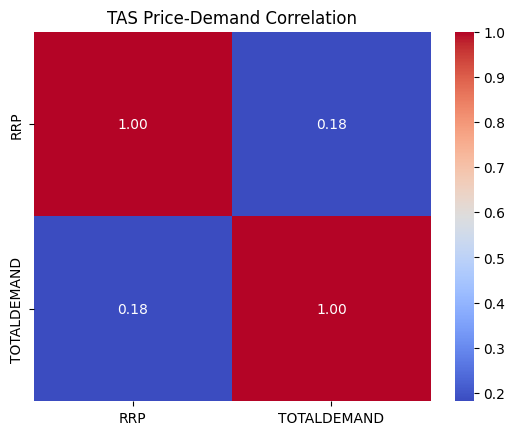

In [10]:
tas_df = run_eda_pipeline(tas_df, region_name="TAS")


========== EDA for VIC ==========
Shape: (374400, 5)

Data Types:
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

Missing Values:
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

Unique Values:
REGION                 1
SETTLEMENTDATE    374400
TOTALDEMAND       233033
RRP                45135
PERIODTYPE             1
dtype: int64


,TOTALDEMAND,RRP
count,374400.000000,374400.000000
mean,4694.505972,83.519340
std,1020.738394,249.277342
min,1400.130000,-1000.000000
25%,4030.877500,8.950000
50%,4580.795000,64.260000
75%,5285.130000,126.840000
max,9887.280000,17500.000000


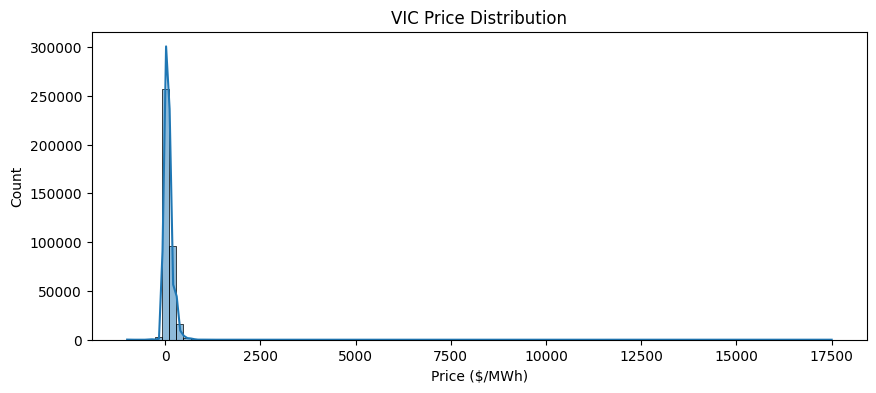

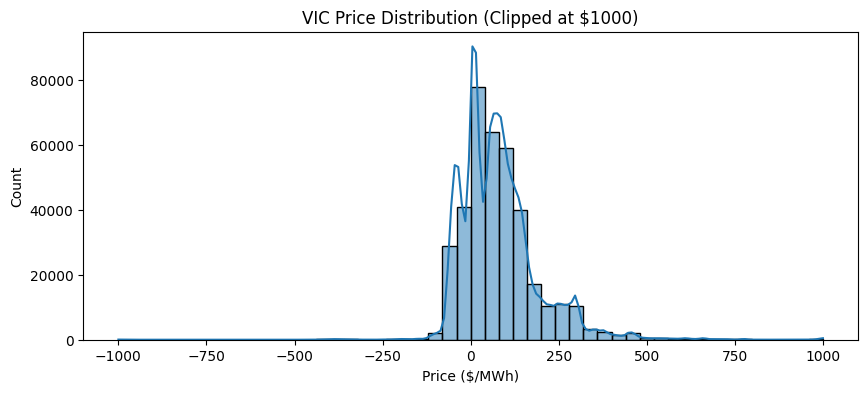

,Price Range ($/MWh),Frequency
0,-1000 to -500,48
1,-500 to -200,515
2,-200 to -100,1247
3,-100 to -50,18915
4,-50 to 0,52017
5,0-50,87281
6,50-100,87237
7,100-200,83600
8,200-500,41100
9,500-1k,2201


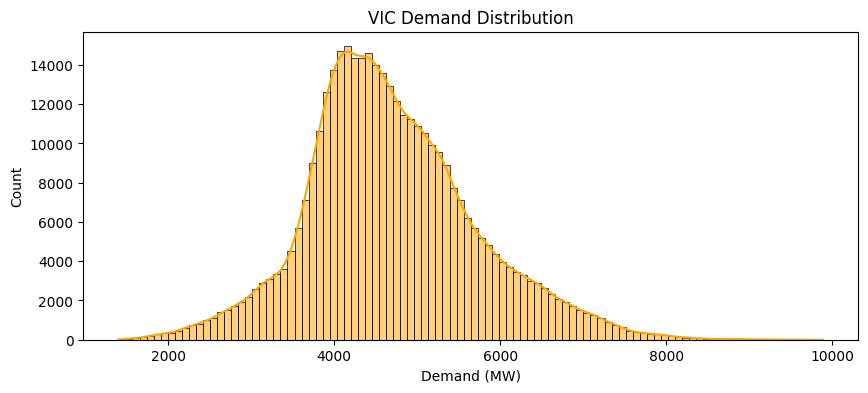

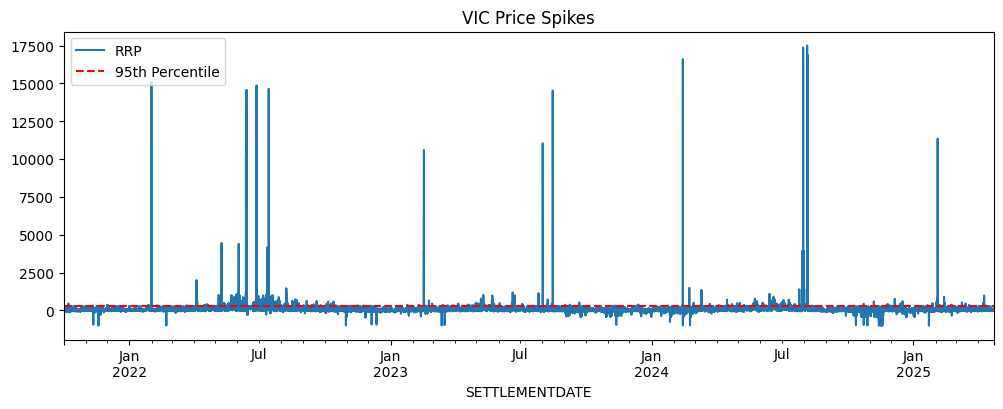

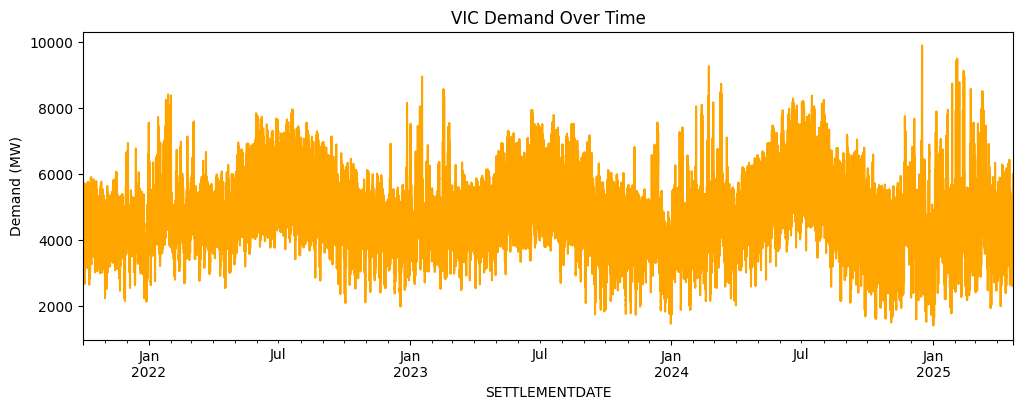

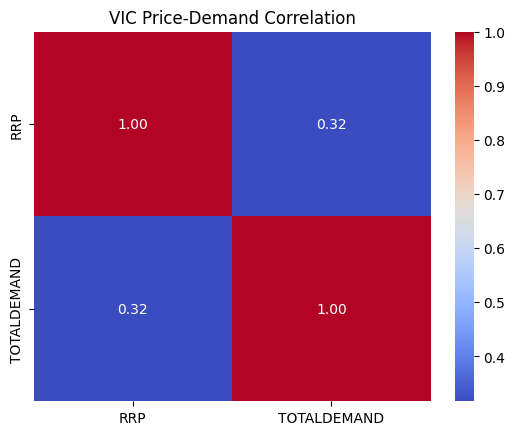

In [11]:
vic_df = run_eda_pipeline(vic_df, region_name="VIC")

In [12]:
dfs = [nsw_df, qld_df, sa_df, tas_df, vic_df]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv("data/NEM/combined_all_states.csv", index=False)

In [ ]:
desc_by_state = (
    combined_df.groupby("REGION")[["RRP", "TOTALDEMAND"]].describe().round(2)
)
desc_by_state

RRP                                                          \
           count    mean     std      min    25%    50%     75%      max   
REGION                                                                     
NSW1    374400.0  127.50  447.30 -1000.00  58.00  88.88  139.00  17500.0   
QLD1    374400.0  129.28  482.04 -1000.00  54.65  89.74  143.00  17500.0   
SA1     374400.0  103.34  468.93 -1000.00   0.02  70.31  139.39  17500.0   
TAS1    374400.0   95.44  258.59  -998.07  31.34  70.21  120.56  17500.0   
VIC1    374400.0   83.52  249.28 -1000.00   8.95  64.26  126.84  17500.0   

       TOTALDEMAND                                                        \
             count     mean      std      min      25%      50%      75%   
REGION                                                                     
NSW1      374400.0  7462.30  1347.48  2532.25  6526.13  7342.56  8222.47   
QLD1      374400.0  6136.56  1060.71  2975.31  5425.88  6018.53  6828.66   
SA1       374400.0  1272.68   428.44  -231.82  1079.64  1328.65  1517.12   
TAS1      374400.0  1131.47   143.93   490.63  1029.52  1111.63  1214.45   
VIC1      374400.0  4694.51  1020.74  1400.13  4030.88  4580.80  5285.13   

                  
             max  
REGION            
NSW1    13763.96  
QLD1    11159.32  
SA1      3326.91  
TAS1     1771.02  
VIC1     9887.28

C:\Users\Srira\AppData\Local\Temp\ipykernel_14376\3598608838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x="REGION", y="RRP_clipped", cut=0, palette="Blues")
C:\Users\Srira\AppData\Local\Temp\ipykernel_14376\3598608838.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x="REGION", y="TOTALDEMAND", cut=0, palette="Oranges")


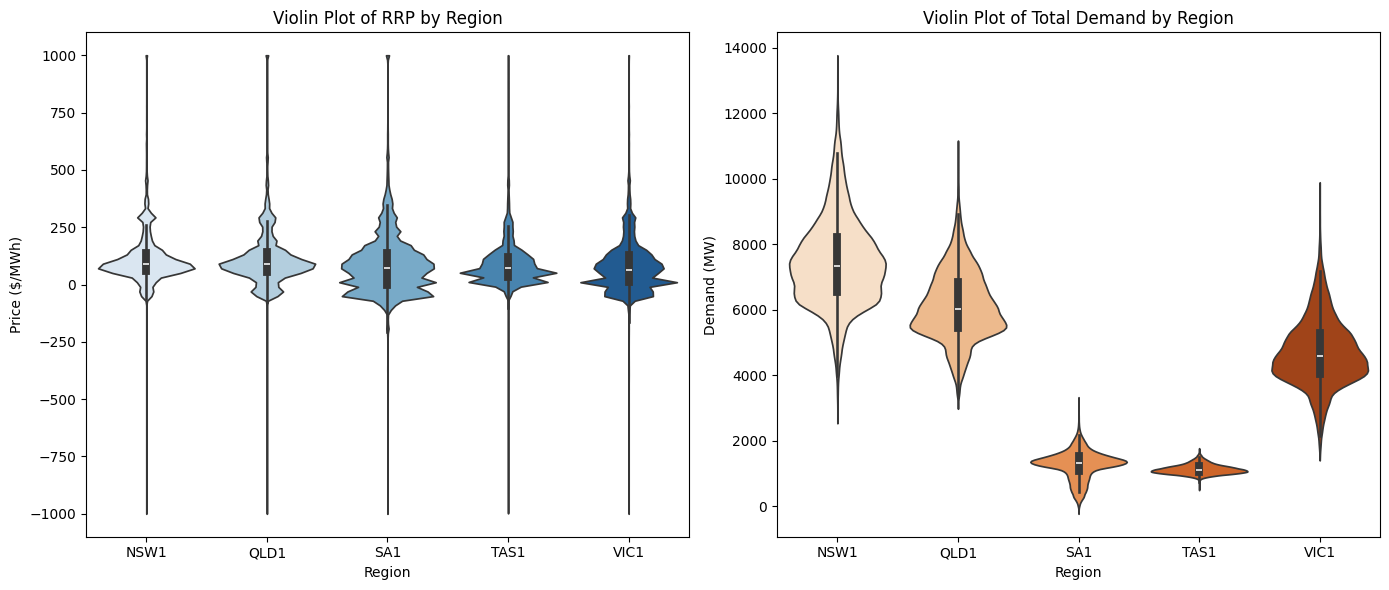

In [14]:
combined_df["RRP_clipped"] = combined_df["RRP"].clip(upper=1000)
plt.figure(figsize=(14, 6))

# Violin plot for RRP
plt.subplot(1, 2, 1)
sns.violinplot(data=combined_df, x="REGION", y="RRP_clipped", cut=0, palette="Blues")
plt.title("Violin Plot of RRP by Region")
plt.ylabel("Price ($/MWh)")
plt.xlabel("Region")

# Violin plot for TOTALDEMAND
plt.subplot(1, 2, 2)
sns.violinplot(data=combined_df, x="REGION", y="TOTALDEMAND", cut=0, palette="Oranges")
plt.title("Violin Plot of Total Demand by Region")
plt.ylabel("Demand (MW)")
plt.xlabel("Region")

plt.tight_layout()
plt.show()

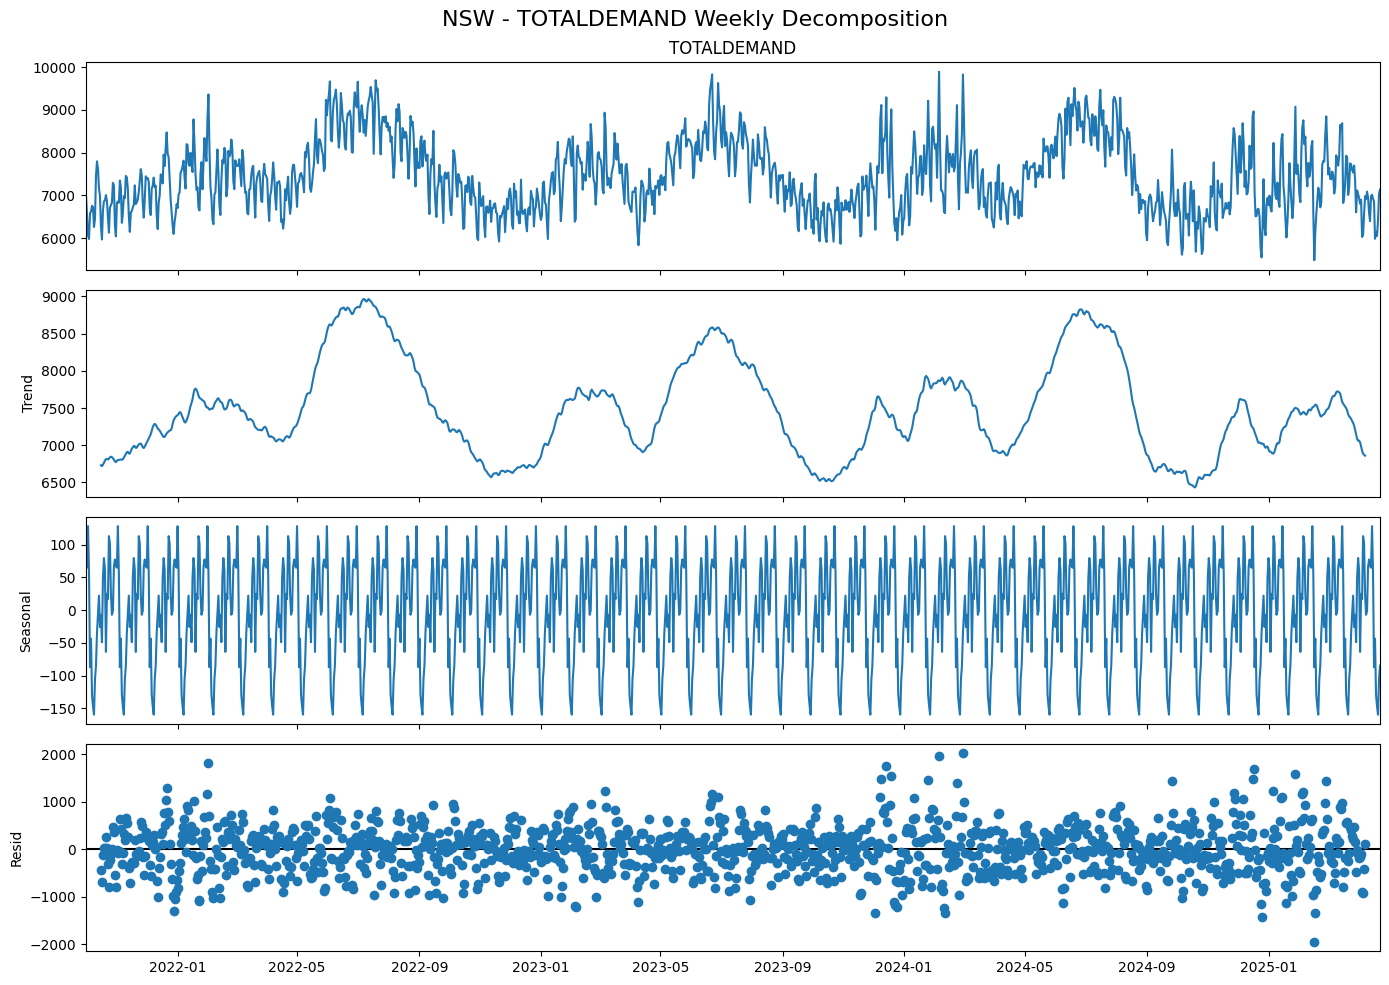

In [ ]:
def plot_daily_decomposition(df, col, region_name="Region"):
    # Resample to weekly frequency
    df_weekly = df[[col]].dropna().resample("D").mean()

    # Apply classical seasonal decomposition with yearly seasonality (assume 52 weeks)
    result = seasonal_decompose(df_weekly[col], model="additive", period=30)

    # Larger and clearer plot
    fig = result.plot()
    fig.set_size_inches(14, 10)
    fig.suptitle(f"{region_name} - {col} Weekly Decomposition", fontsize=16)
    plt.tight_layout()
    plt.show()


plot_daily_decomposition(nsw_df, col="TOTALDEMAND", region_name="NSW")

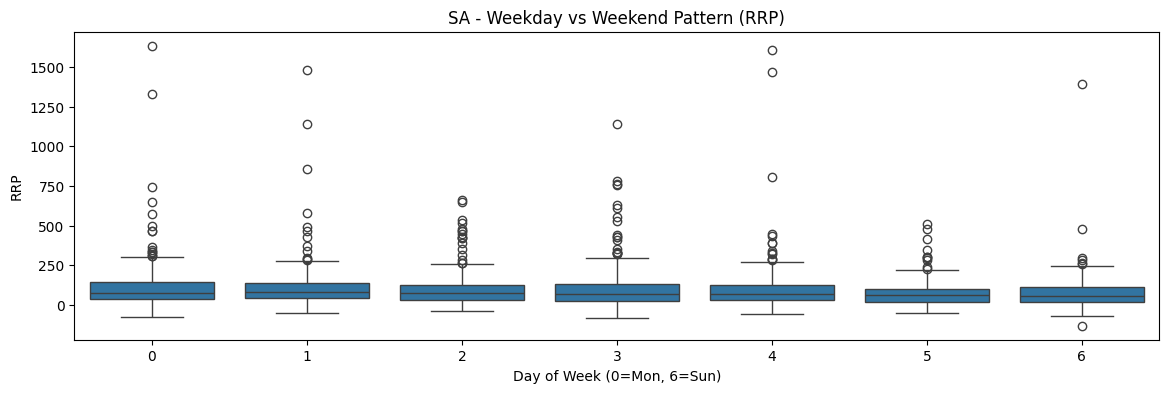

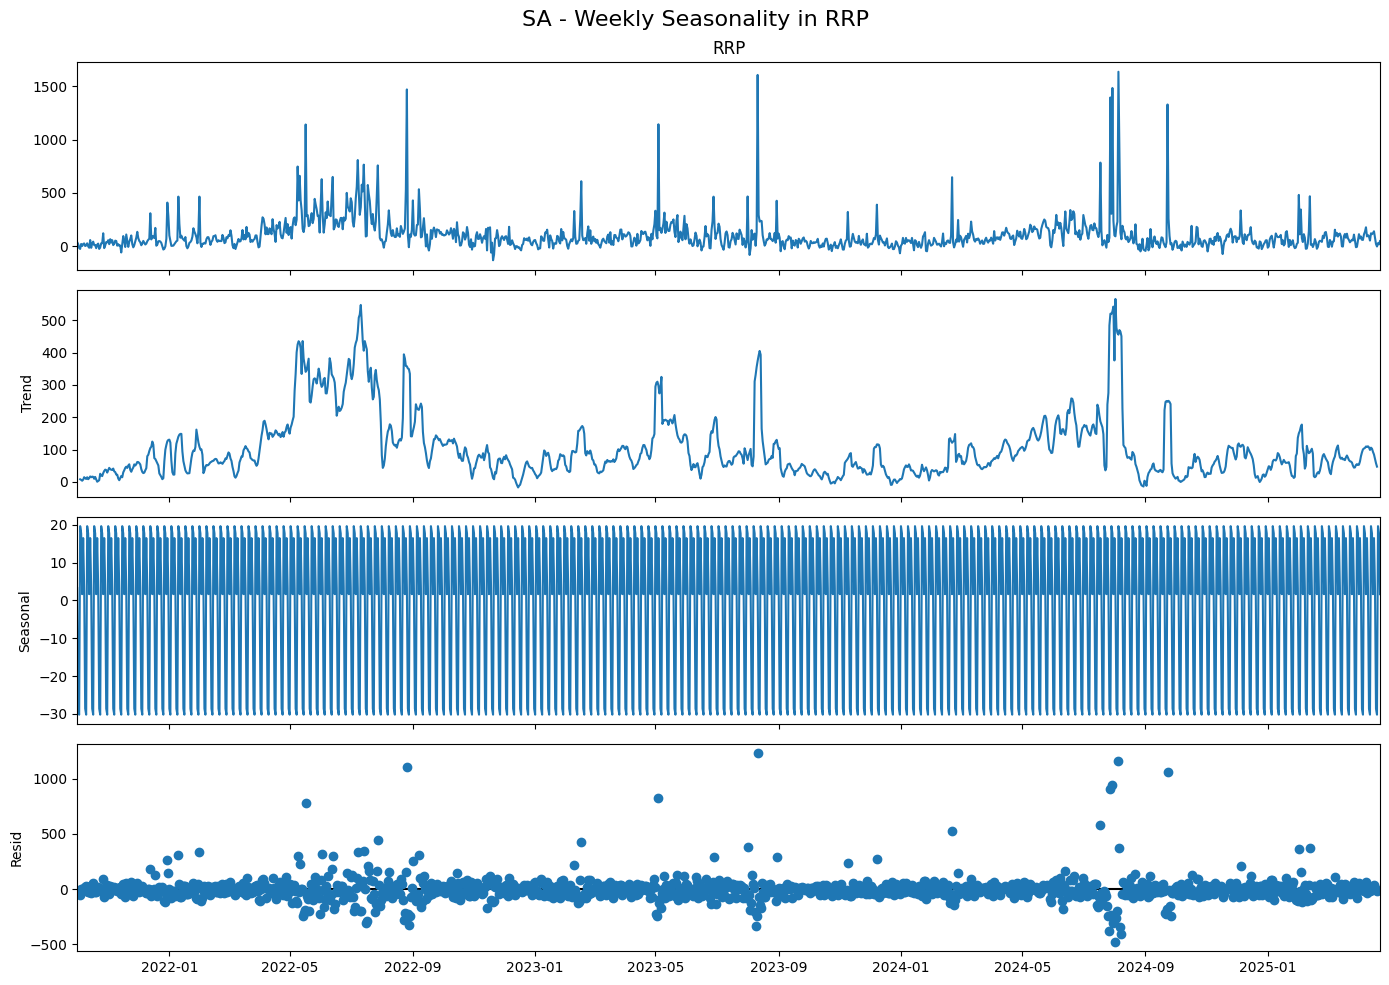

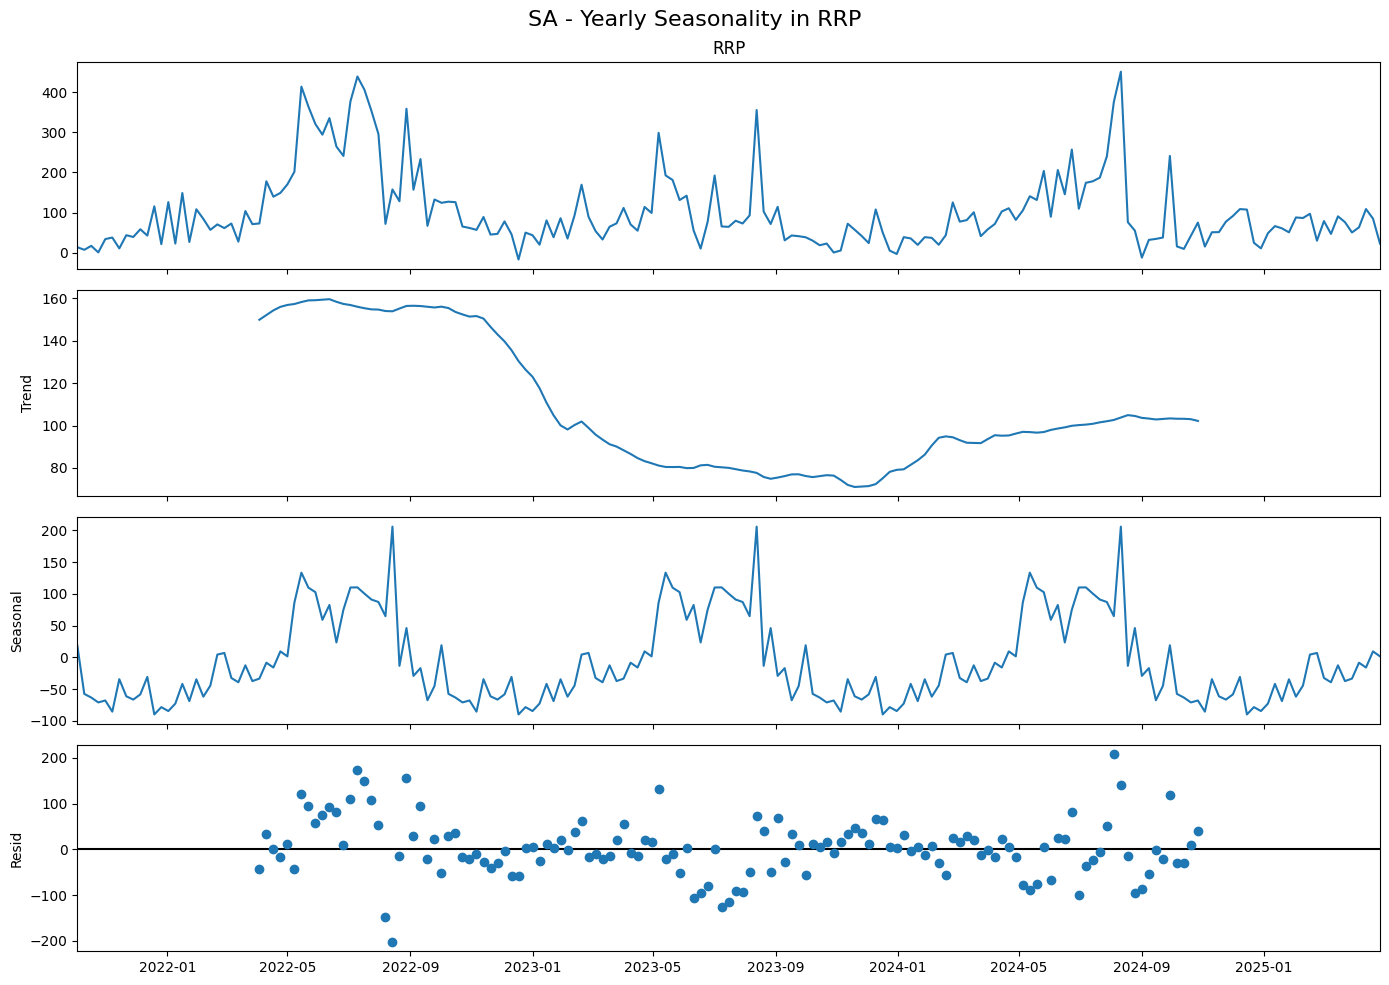

In [ ]:
# Function to visualize weekday/weekend, weekly, and yearly seasonality patterns
def plot_seasonality_patterns(
    df, col, region_name="Region", datetime_col="SETTLEMENTDATE"
):
    """
    Plots weekday vs weekend, weekly, and yearly seasonality patterns.

    Assumes datetime index or will convert based on datetime_col.
    """
    # Ensure datetime index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df[datetime_col] = pd.to_datetime(df[datetime_col])
        df = df.set_index(datetime_col)

    # Drop missing values
    df = df[[col]].dropna()

    # --- Plot 1: Weekday vs Weekend Averages (Daily Frequency) ---
    df["dayofweek"] = df.index.dayofweek
    df["is_weekend"] = df["dayofweek"] >= 5
    daily = df.resample("D").mean()

    plt.figure(figsize=(14, 4))
    sns.boxplot(data=daily, x=daily.index.dayofweek, y=col)
    plt.title(f"{region_name} - Weekday vs Weekend Pattern ({col})")
    plt.xlabel("Day of Week (0=Mon, 6=Sun)")
    plt.ylabel(col)
    plt.show()

    # --- Plot 2: Weekly Seasonality (Resampled Daily with 7-Day Periodicity) ---
    result_weekly = seasonal_decompose(daily[col], model="additive", period=7)
    fig_weekly = result_weekly.plot()
    fig_weekly.set_size_inches(14, 10)
    fig_weekly.suptitle(f"{region_name} - Weekly Seasonality in {col}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # --- Plot 3: Yearly Seasonality (Resampled Weekly) ---
    weekly = df.resample("W").mean()
    if len(weekly) >= 104:  # ensure enough data for 2+ years
        result_yearly = seasonal_decompose(weekly[col], model="additive", period=52)
        fig_yearly = result_yearly.plot()
        fig_yearly.set_size_inches(14, 10)
        fig_yearly.suptitle(f"{region_name} - Yearly Seasonality in {col}", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(
            f"Not enough weekly data for yearly decomposition of {col} in {region_name} (need at least 104 weeks)."
        )


plot_seasonality_patterns(sa_df, col="RRP", region_name="SA")

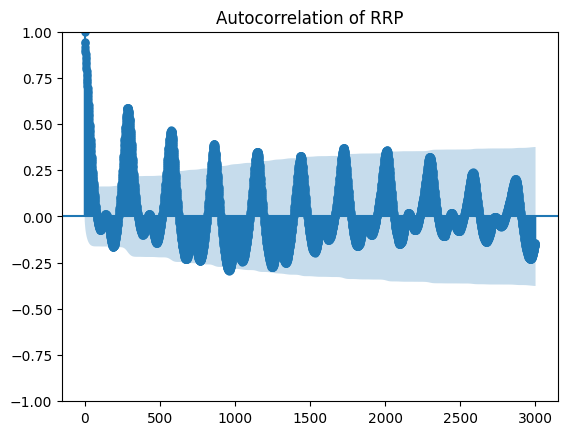

In [ ]:
plot_acf(df["RRP"].dropna(), lags=3000)  # Up to ~10 days
plt.title("Autocorrelation of RRP")
plt.show()